#사이킷 런(scikit-learn)



##1. 사이킨런 특징
* 파이썬을 이용해 머신러닝을 하기위한 라이브러리
* 가장 쉽고 접근성이 용이한 API 지원
* 다양한 알고리즘 지원
* 오랜 기간동안 검증되어 안정화된 라이브러리

> 다음과 같이 사이킷런이 설치되어 있는지 확인한다. 별도의 설치를 위해서는 다음과 같이 라이브러리를 설치해야 한다.
* conda install sciket-learn 또는 pip install sciket-learn

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


##2. 붓꽃 품종 예측하기

###2.1 붓꽃 데이터 읽어 들이기

In [3]:
from sklearn.datasets import load_iris

# 붓꽃 데이터 읽어들이기
iris = load_iris()
# 타입 확인
print(type(iris))
# 내부 key 정보 확인
iris.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

>sklearn의 datasets에는 다양한 종류의 데이터 들이 존재한다.
 * load_boston : 보스톤 집값 데이터
 * load_iris: 아이리스 붓꽃 데이터
 * load_diabetes: 당뇨병 환자 데이터
 * load_digits: 손글씨 데이터
 * load_linnerud: multi-output regression 용 데이터
 * load_wine: 와인 데이터
 * load_breast_cancer: 위스콘신 유방암 환자 데이터

 > 이 중 아이리스 붓꽃 데이터를 분석하기 위해 정보를 읽어 온 것이다. type을 확인해 보니 sklearn.utils.Bunch라는 자료구조를 가지고 있다. Bunch는 Key-value 형식으로 되어 있으며 다음과 같은 key를 가지고 있다.
* data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
* target: Label 데이터, Numpy 배열로 이루어져 있습니다.
* feature_names: Feature 데이터의 이름
* target_names: Label 데이터의 이름
* DESCR: 데이터 셋의 설명
* filename: 데이터 셋의 파일 저장 위치 (csv)


##2.2 붓꽃 정보 분석

In [ ]:
iris_data = iris.data
print(type(iris_data))
iris_data[:5]

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

> 위와 같이 iris의 data를 추출해 보았다. type은 numpy의 배열이며 숫자 데이터를 가지고 있다.

In [ ]:
iris_target = iris.target
print(type(iris_target))
iris_target[:5]

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0])

>target 정보는 numpy의 배열로 되어 있으며 레이블 정보를 갖는다. 현재 보여지는 label은 0이라는 숫자이다.

> data와 1:1로 연결되는 결과가 나타나게 된다.

In [ ]:
iris_feature_names = iris.feature_names
print(type(iris_feature_names))
iris_feature_names

<class 'list'>


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

>feature_names는 붓꽃의 feature 정보이며 list로 되어 있다. 확인 결과 4개의 feature를 사용하는 것을 알 수 있다.

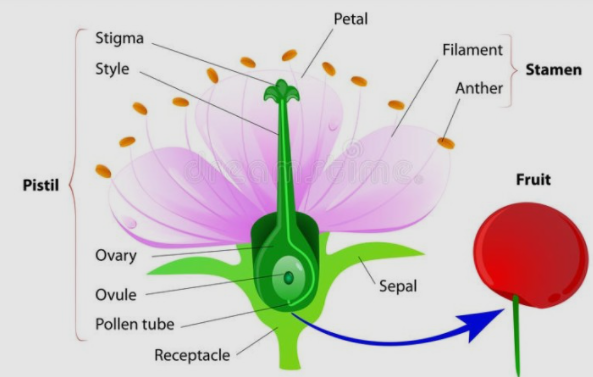

> 위의 그림에서 보듯이 sepal은 꽃받침이 되고 petal은 꽃잎이 된다.

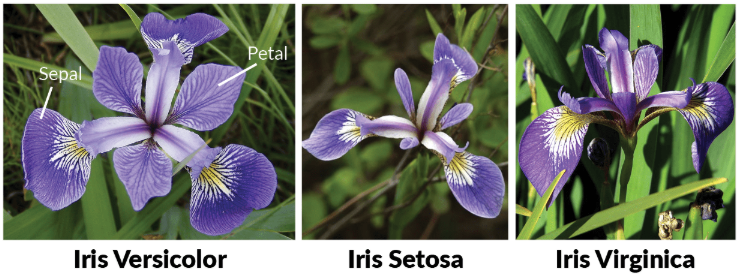

> iris는 위와 같이 3가지로 분류되며 꽃잎과 꽃받침이 다 다름으로 이를 이용하여 각 꽃을 구분할 수 있다.

In [ ]:
iris_target_names = iris.target_names
print(type(iris_target_names))
iris_target_names

<class 'numpy.ndarray'>


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

>target_names는 레이블의 이름으로 numpy의 배열로 되어 있으며 이전 target에서 0으로 표시된 것은 0번 데이터인 setosa가 된다. 

In [ ]:
iris_DESCR = iris.DESCR
print(type(iris_DESCR))
print(iris_DESCR)

>DESCR는 현재 dataset에 대한 간단한 설명을 해준다. 자료형은 str로 되어 있다. 데이터의 개수, 속성, 요약 통계 정보 등을 볼 수 있다.

In [ ]:
iris_filename = iris.filename
print(type(iris_filename))
iris_filename

<class 'str'>


'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv'

> filename은 문자열로 현재 파일이 위치한 정보를 보여준다.

##2.3 데이터셋 변환
>분석을 위해 Dataset으로 만들어 보자

In [4]:
import pandas as pd

iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['label'] = iris.target

df_iris[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


> data와 feature_names를 이용하여 기본 dataframe을 만들고 마지막으로 label을 추가했다.

##2.4 학습 / 검증 데이터 만들기

> 모델을 만들기 위해 원본 데이터를 훈련데이터와 테스트데이터로 나뉘게 된다. 훈련데이터로 모델을 만들고 테스트 데이터로 모델의 성능을 확인하게 된다.

###2.4.1 datasets을 이용한 데이터 생성

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=62)
X_train[:5]
# 
X_train.size

480

> 학습용 데이터를 이용하여 모델을 만들고 테스트용 데이터를 이용하여 모델을 평가할 수 있다. train_test_split 함수는 학습용 데이터와 테스트용 데이터를 분리하기 위해 사용된다.
* 첫 번째 인자(고정) : 분류할 feature 데이터 셋
* 두 번째 인자(고정) : 레이블 데이터 셋
* test_size : 테스트 데이터 셋의 비율, 기본값은 25%
* train_size : 학습용 데이터 셋의 비율, 하지만 통상 test_size를 주로 사용
* shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정, 기본값은 True
* random_state : 이 부분이 생략되면 매 번 다른 데이터를 얻어오게 되며 값을 지정함으로써 고정된 데이터만 읽어 오게 된다.


> 매번 실행할 때마다 다른 결과가 나타나면 학습의 이해도가 떨어질 수 있음으로 네 번째 인자는 고정 시키고 사용한다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
X_train[:5]

print('전체 데이터 크기 : ', iris['data'].size)
print('train 데이터의 기본 크기는 전체의 75% : ', X_train.size)

전체 데이터 크기 :  600
train 데이터의 기본 크기는 전체의 75% :  448


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

print('전체 데이터 크기 : ', iris['data'].size)
print('train 데이터의 기본 크기는 전체의 80% : ', X_train.size)

전체 데이터 크기 :  600
train 데이터의 기본 크기는 전체의 80% :  480


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
X_train[:5]

array([[5.1, 3.4, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.8, 2.8, 4.8, 1.4]])

> 위의 코드를 실행할 때마다 다른 결과를 얻게 된다.

```
array([[5.6, 2.5, 3.9, 1.1],
       [4.4, 2.9, 1.4, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [7.2, 3.2, 6. , 1.8],
       [6.1, 2.6, 5.6, 1.4]])

array([[5.1, 3.4, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.8, 2.8, 4.8, 1.4]])
```

In [ ]:
# 위와 같이 실행할때마다 다른 결과가 나타나는 것을 방지하기 위해 random_state 사용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=62)
X_train[:5]

array([[5.5, 2.3, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.2, 5.7, 2.3],
       [5.8, 4. , 1.2, 0.2]])

###2.4.2 dataframe을 이용한 데이터 생성

> 이전 데이터와 같이 데이터와 label이 분리되어 있으면 편하지만 만약 데이터와 label의 함께 있는 경우라면 다음과 같은 방법으로 분리할 수 있다.

In [ ]:
# 처음부터 3번째 열까지, 모든 feature 정보 출력
df_iris.iloc[:3, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


>위의 dataframe에서 data와 target으로 데이터를 나누어야 한다. data는 4번째 feature 정보까지 임으로 다음과 같이 나눌 수 있다.

In [ ]:
# 처음부터 3번째 열까지, 4번째 feature 정보까지 출력
df_iris.iloc[:3, :4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
df_iris['label'][:5]

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, :4], df_iris['label'], test_size=0.2, random_state=2)
X_train[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
126,6.2,2.8,4.8,1.8
23,5.1,3.3,1.7,0.5
64,5.6,2.9,3.6,1.3
117,7.7,3.8,6.7,2.2
84,5.4,3.0,4.5,1.5


> 다음과 같이 drop을 이용하여 데이터를 구할 수 도 있다.

In [ ]:
df_iris_data = df_iris.drop(['label'], axis=1)
df_iris_label = df_iris['label']
print(df_iris_data[:5])
print(df_iris_label[:5])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_iris_data, df_iris['label'], test_size=0.2, random_state=2)
X_train[:5]

>drop을 이용하여 특정 feature를 제외하고 나머지 feature만 추출할 수도 있다.

> 이러한 다양한 방법으로 dataframe을 이용하여 훈련용과 테스트용 데이터를 분리할 수도 있다.

##2.5 학습하기
> 분류 알고리즘의 하나인 의사결정 트리를 이용하여 학습과 예측을 진행해 보자

###2.5.1 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 얻어오기
dt_clf=DecisionTreeClassifier()
# 모델 생성하기
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

> 의사결정트리(DecisionTreeClassifier)는 추후 학습할 것이며 여기서는 그냥 사용해 보자. fit함수는 과정에 속하는 X_train과 결과에 속하는 y_train을 넣어 주면 학습을 시켜 모델을 만들어 주게 된다.

###2.5.2 예측과 비교

In [ ]:
X_test[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0


In [ ]:
# 예측결과 얻어오기
pred=dt_clf.predict(X_test)
pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [ ]:
y_test[:3]

6      0
3      0
113    2
Name: label, dtype: int64

> 테스트 데이터인 X_test에 따라 predict함수에 입력하면 예측 결과를 확인할 수 있다. 예측 결과와 y_test 정보를 확인해 보면 비슷한 결과를 얻은 것을 볼 수있다.

###2.5.3 예측 정확도


In [ ]:
from sklearn.metrics import accuracy_score

print('예측 정확도 :  {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 :  0.9667


> 그리고 이렇게 주어진 예측 결과에 대한 정확도를 accuracy_score를 통해 확인할 수 있다.